In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
## extra imports to set GPU options
import tensorflow as tf
from keras import backend as k

###################################
# TensorFlow wizardry
config = tf.ConfigProto()

# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

# Only allow a total of half the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 1 # 0.5 for Half

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))


Using TensorFlow backend.


In [3]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model

import tensorflow as tf
import keras
import seaborn as sn
import pandas as pd
import numpy as np
import linecache
import sys
import h5py
import itertools
import matplotlib.pyplot as plt
import os
import pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import RemoteMonitor

In [4]:
tf.__version__

'1.9.0'

In [5]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]

In [6]:
#train_path = '/data/danish/Data/Microsoft-Malware-BIG-2015/Malware_Dataset/train_rgb_images'
#test_path =  '/data/danish/Data/Microsoft-Malware-BIG-2015/Malware_Dataset/test_rgb_images/'
#train_path = '/data/danish/Data/Malimg_Grayscale/'
#test_path  = '/data/danish/Data/Malimg_Grayscale_test/'
#train_path = '/data/danish/Data/Malimg_Grayscale_train/'
#test_path  = '/data/danish/Data/Malimg_Grayscale_test/'
train_path = '/data/danish/Data/IoT_Malware_Opcodes/Training_Dataset_Opcodes_Seq_Freq_QRCode_Images/'
test_path  = '/data/danish/Data/IoT_Malware_Opcodes/Validation_Dataset_Opcodes_Seq_Freq_QRCode_Images/'


In [7]:
datagen_train = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=0.1,#180,
      #width_shift_range=0.1,
      #height_shift_range=0.1,
      #shear_range=0.1,
      #zoom_range=0.1,#[0.9, 1.5],
      #horizontal_flip=True,
      #vertical_flip=True,
      #fill_mode='nearest'
                )

datagen_test = ImageDataGenerator(rescale=1./255)


In [8]:
if False:
    save_to_dir='augmented_images/'
else:
    save_to_dir = None

In [9]:
input_shape=(96,96)
batch_size=64
save_fn='QRCodeImages='+str(input_shape[:])
save_fn

'QRCodeImages=(96, 96)'

In [10]:
generator_train = datagen_train.flow_from_directory(directory=train_path,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    #color_mode="rgb",
                                                    #save_prefix='Train_Aug',
                                                    shuffle=True,
                                                    #save_to_dir=save_to_dir,
                                                    seed=42)

Found 382 images belonging to 2 classes.


In [11]:
steps_train = generator_train.n/ batch_size
print("Steps for Training\n\n",steps_train)

Steps for Training

 5.96875


In [12]:
cls_train = generator_train.classes
print("Labels of samples as integer\n\n",cls_train)

Labels of samples as integer

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
cls_names_train = list(generator_train.class_indices.keys())
print("Name of the classes\n\n",cls_names_train)
num_cls_train = len(cls_names_train)

Name of the classes

 ['benign', 'malicious']


In [14]:
from sklearn.utils.class_weight import compute_class_weight
class_weight_train = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(cls_train),
                                    y=cls_train)

In [15]:
#cls_names_train
class_labels = ['malicious','benign']

In [16]:
class_weight_train

array([ 1.02688172,  0.9744898 ])

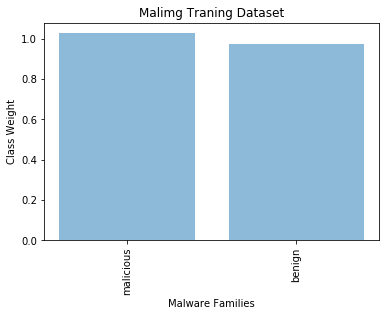

In [17]:
objects = class_labels#class_dictionary_train#cls_names_train#('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = class_weight_train#[10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.xlabel('Malware Families')
plt.ylabel('Class Weight')
plt.title('Malimg Traning Dataset')
 
plt.show()

In [18]:
generator_test = datagen_test.flow_from_directory(directory=test_path,
                                                  target_size=input_shape,
                                                  class_mode='categorical',
                                                  #color_mode="rgb",
                                                  #save_prefix='Test_Aug',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=42)

Found 165 images belonging to 2 classes.


In [19]:
steps_test = generator_test.n / batch_size
print("Steps for Test\n\n",steps_test)

Steps for Test

 2.578125


In [20]:
cls_test = generator_test.classes
print("Labels of samples as integer\n\n",cls_test)

Labels of samples as integer

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
cls_names_test = list(generator_test.class_indices.keys())
print("Name of the classes\n\n",cls_names_test)

Name of the classes

 ['benign', 'malicious']


In [22]:
from sklearn.utils.class_weight import compute_class_weight
class_weight_test = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(cls_test),
                                    y=cls_test)

In [23]:
class_weight_test

array([ 1.03125   ,  0.97058824])

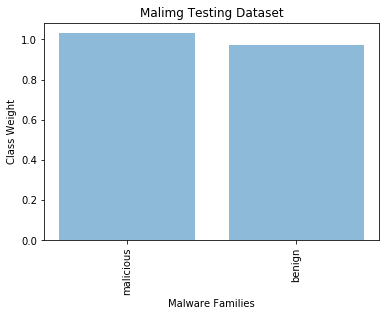

In [24]:
objects = class_labels#class_dictionary_train#cls_names_train#('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = class_weight_test#[10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.xlabel('Malware Families')
plt.ylabel('Class Weight')
plt.title('Malimg Testing Dataset')
 
plt.show()

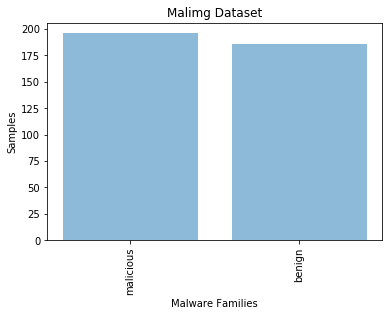

In [25]:
objects = class_labels#class_dictionary_train#cls_names_train#('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [196,186]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.xlabel('Malware Families')
plt.ylabel('Samples')
plt.title('Malimg Dataset')
 
plt.show()

In [26]:
model_ = keras.applications.resnet50.ResNet50(include_top=False)
#model.summary()
transfer_layer = model_.get_layer('activation_49')
print(transfer_layer.output)

conv_model = Model(inputs=model_.input,
                   outputs=transfer_layer.output)
conv_model.summary()


/home/danish/anaconda3/envs/tf/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Tensor("activation_49/Relu:0", shape=(?, ?, ?, 2048), dtype=float32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
________________________________________

In [27]:
model = Sequential()
model.add(conv_model)
model.add(keras.layers.pooling.GlobalAveragePooling2D(name='avg_pool'))
model.add(Dense(2, activation='softmax'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, None, None, 2048)  23587712  
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit_generator(generator=generator_train,
                                epochs=50,
                                steps_per_epoch=steps_train,
                                class_weight=class_weight_train,
                                validation_data=generator_test,
                                validation_steps=steps_test
                                )

Epoch 1/50
6/5 [==============================] - 19s 3s/step - loss: 0.8748 - acc: 0.6184 - val_loss: 8.2888 - val_acc: 0.4848
Epoch 2/50
6/5 [==============================] - 1s 154ms/step - loss: 0.4546 - acc: 0.8531 - val_loss: 7.6062 - val_acc: 0.4848
Epoch 3/50
6/5 [==============================] - 1s 162ms/step - loss: 0.3768 - acc: 0.8554 - val_loss: 6.0711 - val_acc: 0.5152
Epoch 4/50
6/5 [==============================] - 1s 157ms/step - loss: 0.1144 - acc: 0.9686 - val_loss: 3.6263 - val_acc: 0.6667
Epoch 5/50
6/5 [==============================] - 1s 154ms/step - loss: 0.0970 - acc: 0.9762 - val_loss: 3.0320 - val_acc: 0.6242
Epoch 6/50
6/5 [==============================] - 1s 145ms/step - loss: 0.1274 - acc: 0.9607 - val_loss: 2.3442 - val_acc: 0.6424
Epoch 7/50
6/5 [==============================] - 1s 152ms/step - loss: 0.0933 - acc: 0.9815 - val_loss: 2.2109 - val_acc: 0.6788
Epoch 8/50
6/5 [==============================] - 1s 147ms/step - loss: 0.0618 - acc: 0.9948

In [31]:
model.save("ResNet50.h5")

In [32]:
#####################################
# write Traning History to a file
output = open('ResNet50-History.pkl', 'wb')
pickle.dump(history.history, output)
output.close()
#####################################

In [33]:

# read Traning History back from the file
pkl_file = open('ResNet50-History.pkl', 'rb')
history = pickle.load(pkl_file)
pkl_file.close()

In [34]:
scores = model.evaluate_generator(generator_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 0s 67ms/step
acc: 75.76%


In [35]:
cls_pred = model.predict_generator(generator_test, verbose=1)#, steps_test, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

3/3 [==============================] - 2s 567ms/step


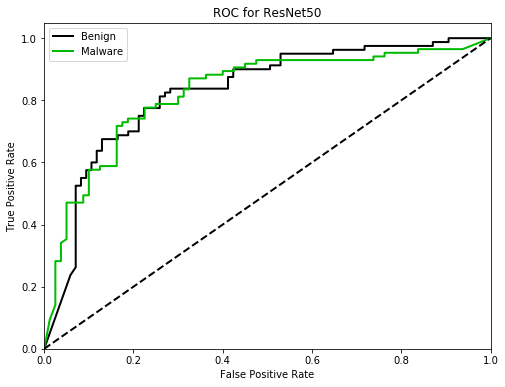

In [37]:
import scikitplot as skplt
import matplotlib.pyplot as plt


y_true = cls_test# ground truth labels
y_probas = cls_pred# predicted probabilities generated by sklearn classifier

list_fams = ['Benign','Malware']
figsize=(8,6)
title = "ROC for ResNet50"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_true, y_probas,ax=ax, plot_macro=False, plot_micro=False )

ax.set_title(title, fontsize=title_fontsize)
#ax.get_legend()#.remove()
ax.legend(list_fams)
plt.savefig("ROC for ResNet50.png")
plt.show()

In [38]:
cls_pred = np.argmax(cls_pred, axis=1)

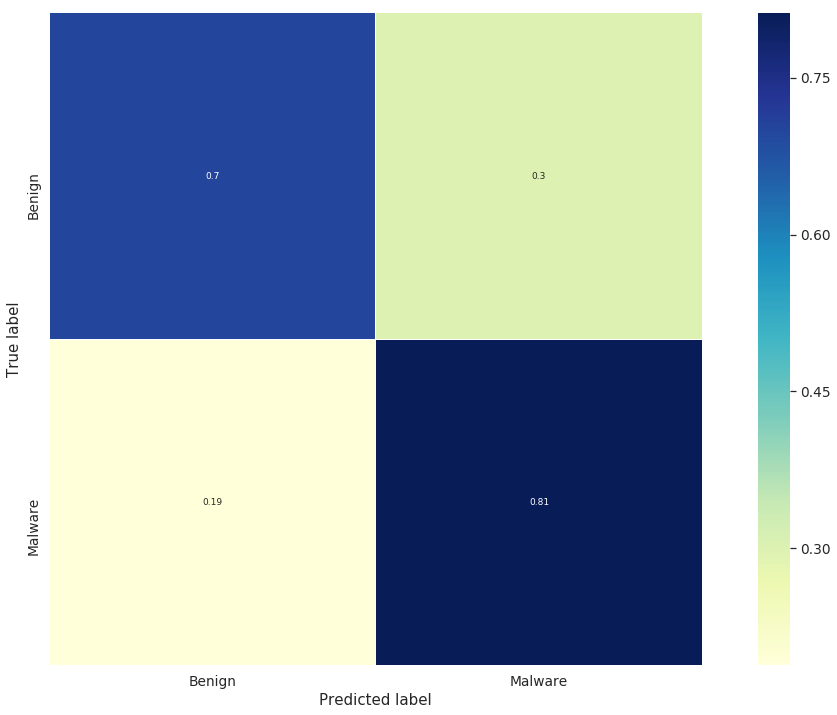

In [39]:
import seaborn as sns

def plot_confusion_matrix():
    
    list_fams=['Benign','Malware']
    
    
    cm = confusion_matrix(y_true=cls_test, y_pred=cls_pred)
    
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    figure = plt.gcf()
    figure.set_size_inches(20, 12)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cmap= "YlGnBu" ,cbar=True, annot=True, square=True,
                 annot_kws={'size': 9}, linewidth = 0.01,
                 yticklabels=list_fams, xticklabels=list_fams)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig('ResNet50-Matrix.png', bbox_inches='tight')
    plt.show()
    
plot_confusion_matrix()

In [40]:
%%time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
cls_true = cls_test = generator_test.classes
accuracy = accuracy_score(cls_true, cls_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(cls_true, cls_pred, average=None)

print("All Classes")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

All Classes
Precision:  [ 0.77777778  0.74193548]
Recall:  [ 0.7         0.81176471]
F1 score:  [ 0.73684211  0.7752809 ]
CPU times: user 6.1 ms, sys: 136 µs, total: 6.23 ms
Wall time: 4.56 ms


In [41]:
%%time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
cls_true = cls_test = generator_test.classes
accuracy = accuracy_score(cls_true, cls_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(cls_true, cls_pred, average='micro')

print("Micro")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

Micro
Precision:  0.757575757576
Recall:  0.757575757576
F1 score:  0.757575757576
CPU times: user 4.51 ms, sys: 0 ns, total: 4.51 ms
Wall time: 3.31 ms


In [42]:
%%time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
cls_true = cls_test = generator_test.classes
accuracy = accuracy_score(cls_true, cls_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(cls_true, cls_pred, average='macro')

print("Macro")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

Macro
Precision:  0.759856630824
Recall:  0.755882352941
F1 score:  0.75606150207
CPU times: user 3.84 ms, sys: 0 ns, total: 3.84 ms
Wall time: 3.06 ms


In [43]:
%%time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
cls_true = cls_test = generator_test.classes
accuracy = accuracy_score(cls_true, cls_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(cls_true, cls_pred, average='weighted')

print("weighted")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

weighted
Precision:  0.759313565765
Recall:  0.757575757576
F1 score:  0.756643908034
CPU times: user 4.32 ms, sys: 0 ns, total: 4.32 ms
Wall time: 3.33 ms


In [44]:
def plot_history(history):
    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]
    plt.figure(figsize = (25,7))
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history[l], 'b', label='Training loss (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'g', label='Testing loss (' + str(str(format(history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(save_fn+'_Graph#######LOSS.png', bbox_inches='tight')
    
    
    ## Accuracy
    plt.figure(figsize = (25,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history[l], 'b', label='Training accuracy (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'g', label='Testing accuracy (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(save_fn+'_Graph#######ACC.png', bbox_inches='tight')
    plt.show()

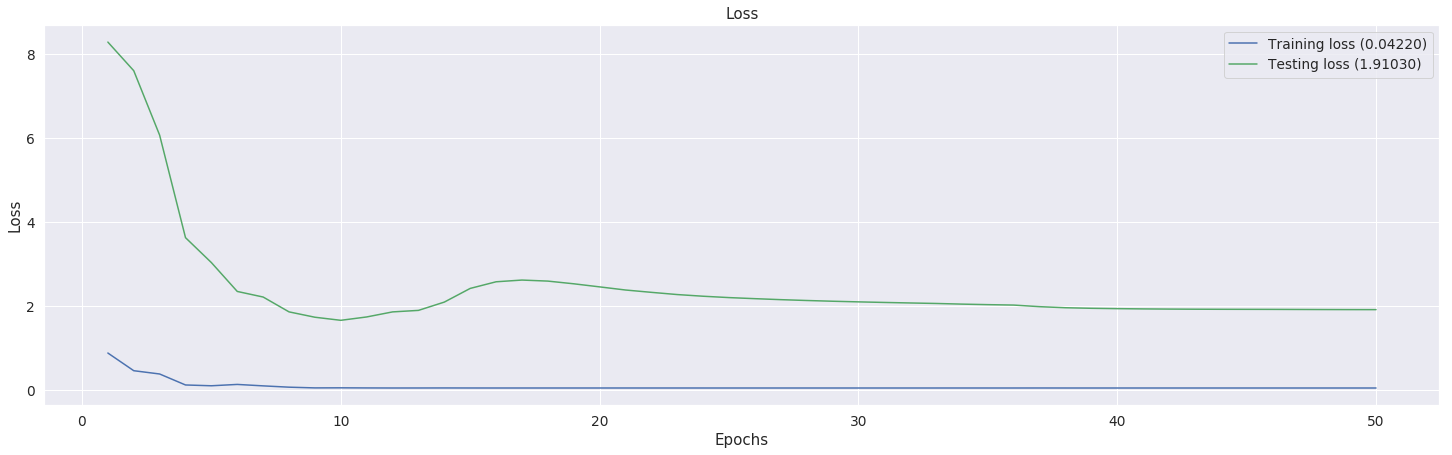

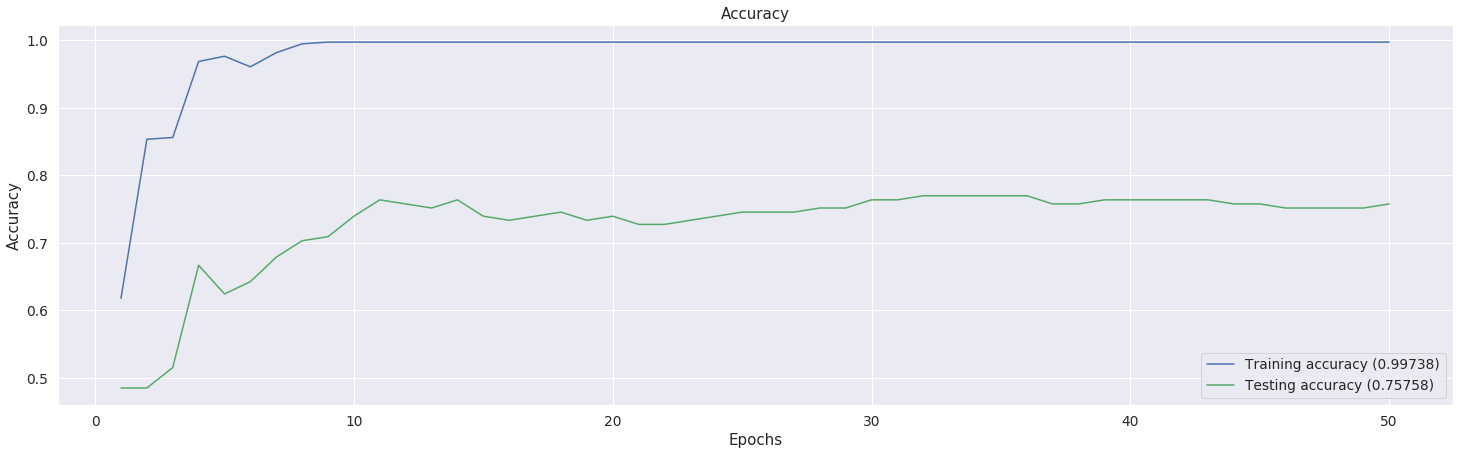

In [45]:
plot_history(history)

In [46]:
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history) 

csv_file = 'QR-Images-History.csv'
with open(csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [47]:
from pycm import ConfusionMatrix

CM_1DCNN = ConfusionMatrix(cls_test,cls_pred)
CM_1DCNN.save_csv("CM_QR-Images",address=True)

{'Status': True,
 'Message': '/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IoT-Ensemble/QR-Images(ResNet50)/CM_QR-Images.csv'}

In [48]:
print(CM_1DCNN)

Predict  0        1        
Actual
0        56       24       

1        16       69       





Overall Statistics : 

95% CI                                                            (0.69219,0.82297)
ACC Macro                                                         0.75758
AUNP                                                              0.75588
AUNU                                                              0.75588
Bennett S                                                         0.51515
CBA                                                               0.72097
Chi-Squared                                                       43.8852
Chi-Squared DF                                                    1
Conditional Entropy                                               0.78675
Cramer V                                                          0.51572
Cross Entropy                                                     1.00619
F1 Macro                                                      